In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.api import OLS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#READ DATA IN THRU PANDAS
cars = pd.read_csv('CARS.csv')

In [3]:
#DETERINE HOW MANY ROWS & DIMENSIONS ARE IN THE DATA
cars.shape

(428, 15)

In [4]:
#TAKE A PEEK AT THE DATA
cars.head()

Make           Model   Type Origin DriveTrain     MSRP  Invoice  \
0  Acura             MDX    SUV   Asia        All  $36,945  $33,337   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  $23,820  $21,761   
2  Acura         TSX 4dr  Sedan   Asia      Front  $26,990  $24,647   
3  Acura          TL 4dr  Sedan   Asia      Front  $33,195  $30,299   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  $43,755  $39,014   

   EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0         3.5        6.0         265        17           23    4451   
1         2.0        4.0         200        24           31    2778   
2         2.4        4.0         200        22           29    3230   
3         3.2        6.0         270        20           28    3575   
4         3.5        6.0         225        18           24    3880   

   Wheelbase  Length  
0        106     189  
1        101     172  
2        105     183  
3        108     186  
4        115     197

In [5]:
#SEE THE LIST ALL ALL DIMENSIONS W/ DATA TYPE INSIGHTS IN ONE SNAPSHOT
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


In [ ]:
########################################################################### 
                        
                            #DATA CLEANING#

########################################################################### 

In [7]:
#REMOVE UNNECESSARY FIELDS FROM FILE 
cars.drop(['Length', 'Wheelbase', 'Weight', 'Model'], axis = 1)

Make   Type  Origin DriveTrain     MSRP  Invoice  EngineSize  Cylinders  \
0    Acura    SUV    Asia        All  $36,945  $33,337         3.5        6.0   
1    Acura  Sedan    Asia      Front  $23,820  $21,761         2.0        4.0   
2    Acura  Sedan    Asia      Front  $26,990  $24,647         2.4        4.0   
3    Acura  Sedan    Asia      Front  $33,195  $30,299         3.2        6.0   
4    Acura  Sedan    Asia      Front  $43,755  $39,014         3.5        6.0   
..     ...    ...     ...        ...      ...      ...         ...        ...   
423  Volvo  Sedan  Europe      Front  $40,565  $38,203         2.4        5.0   
424  Volvo  Sedan  Europe      Front  $42,565  $40,083         2.3        5.0   
425  Volvo  Sedan  Europe      Front  $45,210  $42,573         2.9        6.0   
426  Volvo  Wagon  Europe      Front  $26,135  $24,641         1.9        4.0   
427  Volvo  Wagon  Europe        All  $35,145  $33,112         2.5        5.0   

     Horsepower  MPG_City  MPG_Highway  
0           265        17           23  
1           200        24           31  
2           200        22           29  
3           270        20           28  
4           225        18           24  
..          ...       ...          ...  
423         197        21           28  
424         242        20           26  
425         268        19           26  
426         170        22           29  
427         208        20           27  

[428 rows x 11 columns]

In [8]:
#REMOVE SPECIAL CHARACTERS/TRANFORM DATA-TYPES && SET DATA TYPE AS INT FOR QUANTITATIVE STUDY
cars['Invoice'] = cars['Invoice'].str.replace('$','')
cars['Invoice'] = cars['Invoice'].str.replace(',','')


cars['Invoice'] = cars['Invoice'].astype(int)

In [9]:
cars['MSRP'] = cars['MSRP'].str.replace('$','')
cars['MSRP'] = cars['MSRP'].str.replace(',','')
cars['MSRP'] = cars['MSRP'].astype(int)

In [10]:
cars.head()

Make           Model   Type Origin DriveTrain   MSRP  Invoice  EngineSize  \
0  Acura             MDX    SUV   Asia        All  36945    33337         3.5   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  23820    21761         2.0   
2  Acura         TSX 4dr  Sedan   Asia      Front  26990    24647         2.4   
3  Acura          TL 4dr  Sedan   Asia      Front  33195    30299         3.2   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  43755    39014         3.5   

   Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  
0        6.0         265        17           23    4451        106     189  
1        4.0         200        24           31    2778        101     172  
2        4.0         200        22           29    3230        105     183  
3        6.0         270        20           28    3575        108     186  
4        6.0         225        18           24    3880        115     197

In [11]:
#DROP NULL VALUES IF THERE ARE ANY
cars.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [12]:
cars = cars.dropna()

In [13]:
cars['MSRP'].max()

192465

In [14]:
cars['MSRP'].min()

10280

In [ ]:
########################################################################### 
                        
                            #VISUALIZATIONS#

########################################################################### 

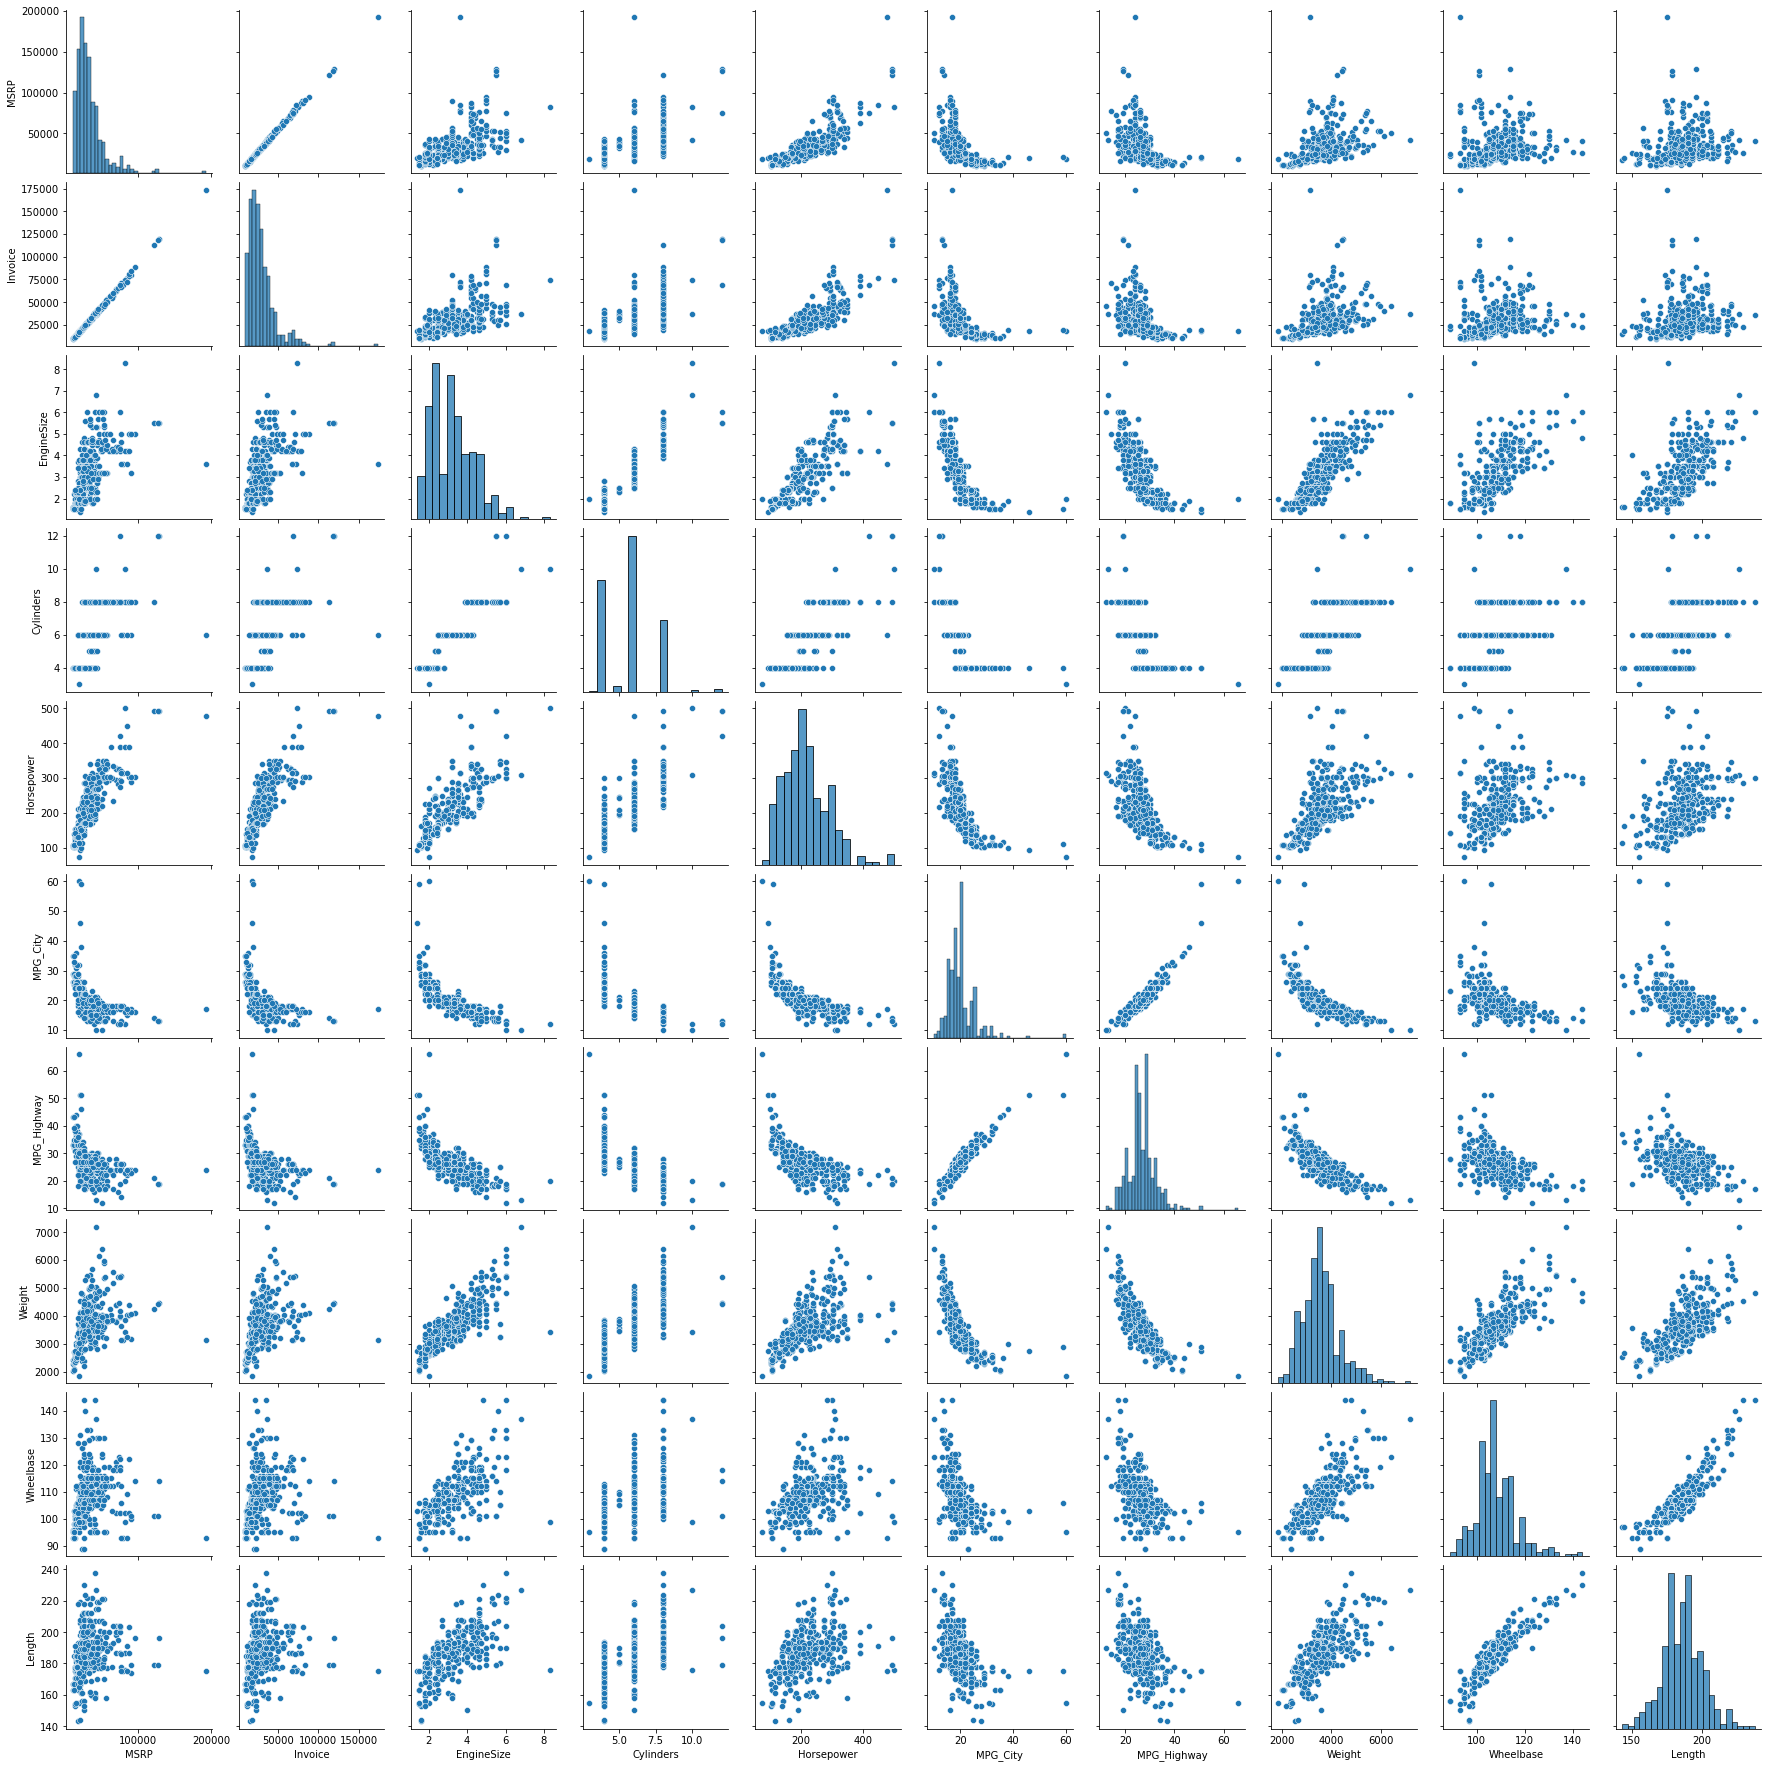

In [65]:
sns.pairplot(data = cars)

In [15]:
cars.Make.unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hummer', 'Hyundai',
       'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mercury',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Pontiac', 'Porsche', 'Saab',
       'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [79]:
import plotly

ModuleNotFoundError: No module named 'plotly'

In [80]:
pip install plotly

     |████████████████████████████████| 13.2 MB 3.6 MB/s eta 0:00:01
  Using cached retrying-1.3.3.tar.gz (10 kB)
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=02e4e540e5ee084e0033c254540836ad9f9cc1f526108677d3981c59d081d5b7
  Stored in directory: /Users/gilbertking/Library/Caches/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [25]:
fig = px.histogram(cars, x= 'Make', labels = {'Make': 'Manufacturer'}, title='Make of the car', color_discrete_sequence = ['maroon'])
fig.show()

In [26]:
fig = px.histogram(cars, x='Type', labels={'Type of Car'}, title='Type of Car',color_discrete_sequence = ['purple'])
fig.show()

In [27]:
fig = px.histogram(cars, x='DriveTrain', labels={'Drive Train Type'}, title='Drive Train Types',color_discrete_sequence = ['navy'])
fig.show()

In [29]:
fig = px.histogram(cars, x = "Make",
                  color = "Origin",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE OF THE CAR Vs LOCATION")
                  
fig.show()

In [30]:
fig = px.histogram(cars, x = "Make",
                  color = "Type",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE AND TYPE OF THE CAR",
                  opacity = 1)
                  
fig.show()

In [31]:
cars.corr()

MSRP   Invoice  EngineSize  Cylinders  Horsepower  MPG_City  \
MSRP         1.000000  0.999132    0.573238   0.649742    0.827296 -0.475916   
Invoice      0.999132  1.000000    0.566019   0.645226    0.824079 -0.471304   
EngineSize   0.573238  0.566019    1.000000   0.908002    0.793250 -0.717860   
Cylinders    0.649742  0.645226    0.908002   1.000000    0.810341 -0.684402   
Horsepower   0.827296  0.824079    0.793250   0.810341    1.000000 -0.677034   
MPG_City    -0.475916 -0.471304   -0.717860  -0.684402   -0.677034  1.000000   
MPG_Highway -0.440523 -0.435452   -0.725901  -0.676100   -0.647425  0.940993   
Weight       0.447987  0.441916    0.808707   0.742209    0.631758 -0.740418   
Wheelbase    0.151665  0.148003    0.638947   0.546730    0.387561 -0.508029   
Length       0.171060  0.165645    0.636015   0.547783    0.382386 -0.504184   

             MPG_Highway    Weight  Wheelbase    Length  
MSRP           -0.440523  0.447987   0.151665  0.171060  
Invoice        -0.435452  0.441916   0.148003  0.165645  
EngineSize     -0.725901  0.808707   0.638947  0.636015  
Cylinders      -0.676100  0.742209   0.546730  0.547783  
Horsepower     -0.647425  0.631758   0.387561  0.382386  
MPG_City        0.940993 -0.740418  -0.508029 -0.504184  
MPG_Highway     1.000000 -0.793615  -0.525457 -0.468756  
Weight         -0.793615  1.000000   0.760857  0.689168  
Wheelbase      -0.525457  0.760857   1.000000  0.889838  
Length         -0.468756  0.689168   0.889838  1.000000

<AxesSubplot:>

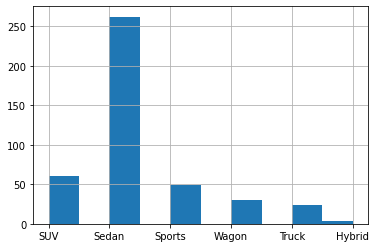

In [10]:
cars['Type'].hist()

<AxesSubplot:>

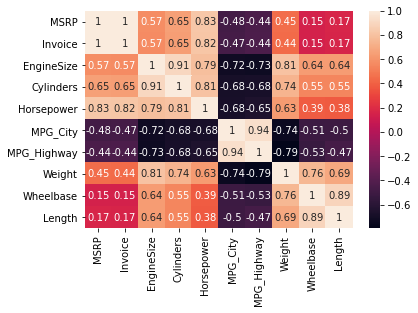

In [32]:
sns.heatmap(cars.corr(), annot= True)

<AxesSubplot:>

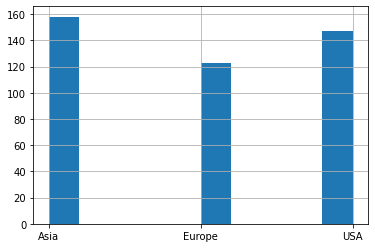

In [12]:
cars['Origin'].hist()

<AxesSubplot:>

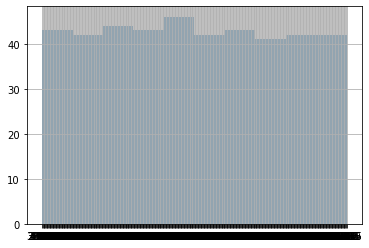

In [40]:
cars['MSRP'].hist()

<AxesSubplot:>

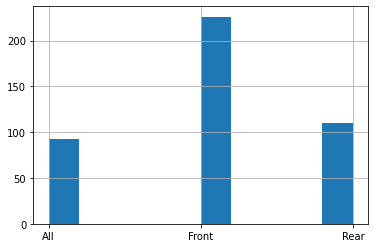

In [45]:
cars['DriveTrain'].hist()

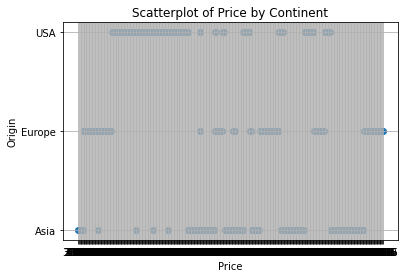

In [39]:
plt.scatter(cars['MSRP'], cars['Origin'])
plt.title('Scatterplot of Price by Continent')
plt.xlabel('Price')
plt.ylabel('Origin')
plt.grid()
plt.show()

In [ ]:
#DO A COUPLE PLOTS WITH INTERESTING POINTS

In [25]:
#CREATE DUMMY VARIABLES OF ORIGIN, TYPE, DRIVETRAIN ** why should i keep make **

In [12]:
#pd.get_dummies(cars, columns=['Origin'])

In [13]:
#pd.get_dummies(cars, columns=['Type'])

In [14]:
#pd.get_dummies(cars, columns=['DriveTrain'])